<a href="https://colab.research.google.com/github/halaalduh/Diabetes-Prediction-using-Healthcare-Dataset/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Healthcare-Diabetes.csv")



In [21]:
# 1. Summarization
# Show dataset info
print("Dataset Info:")
df.info()

# Identify categorical columns
categorical_cols = ['Outcome']

# Summarize categorical columns
print("Value counts for Outcome:")
print(df['Outcome'].value_counts())

# Summarize missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_df)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
Value counts for Outcome:
Outcome
0    1816
1     952
Name: count, dtype: int64

Missing Values Summary:
                          Missing Count  Missing Percent
Id   

/tmp/ipython-input-2284504999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


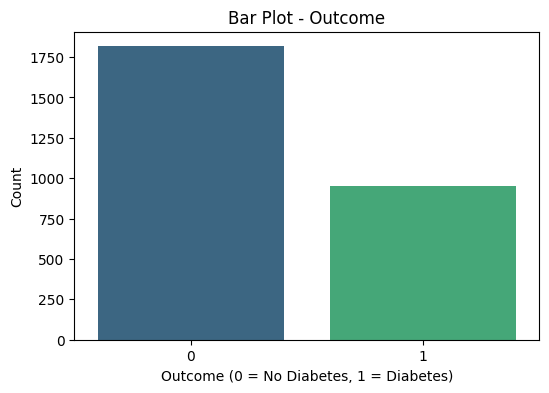

In [15]:
# 2. Visualizations

# Bar Plot for Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Bar Plot - Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

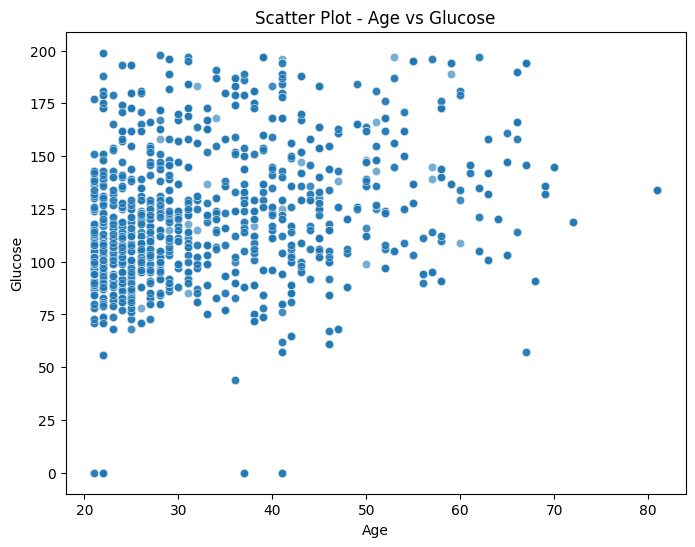

In [14]:

# Scatter Plot between two numeric columns
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Glucose', data=df, alpha=0.6)
plt.title('Scatter Plot - Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show


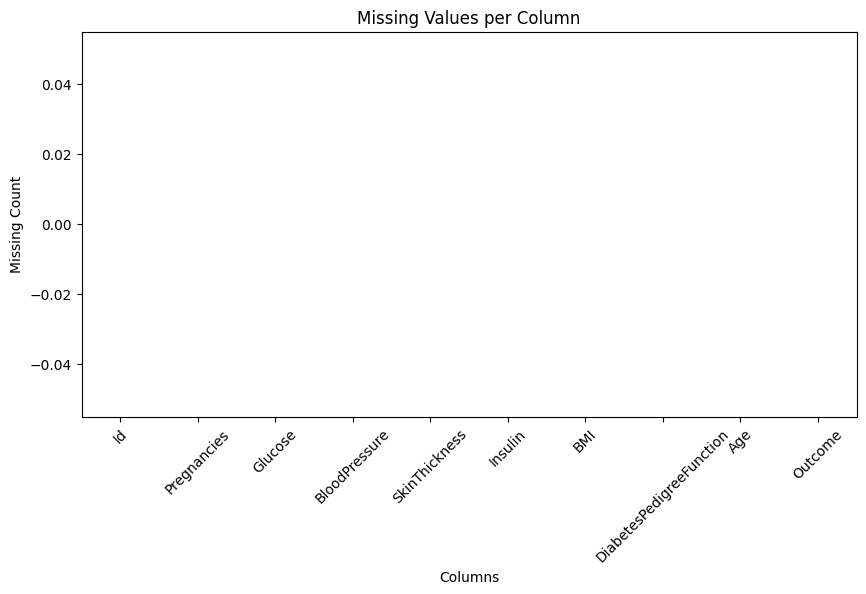

In [20]:
 #Missing Values Bar Plot

missing_count = df.isnull().sum()
missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values
})

plt.figure(figsize=(10,5))
sns.barplot(x='Column', y='Missing Count', data=missing_df, color='red')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.show()